# **Lab 1** - Image Processing in Spatial Domain
#### Pengcit B
#### Ardian
#### 2106638173

## Used Libraries

In [141]:
from skimage import color, io, util, filters, morphology
import matplotlib.pyplot as plt
import numpy as np

## 1. Baby Patrick

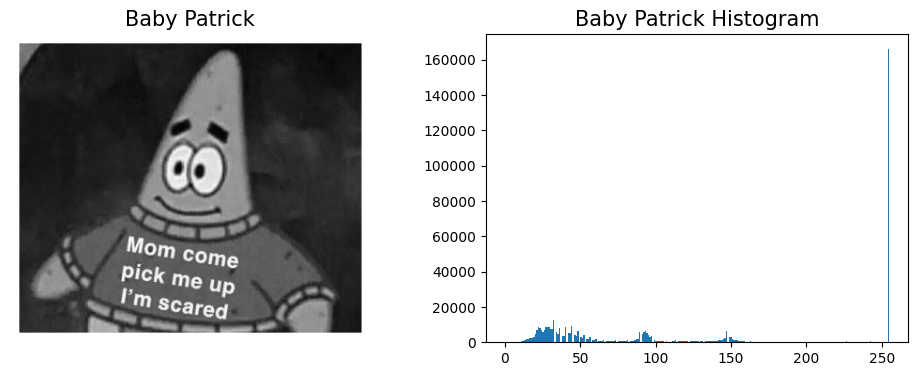

In [142]:
baby_patrick = io.imread('lab/baby-patrick.png')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(baby_patrick)
plt.axis("off")
plt.title('Baby Patrick', fontsize=15)

img_flat = util.img_as_ubyte(baby_patrick).flatten()

plt.subplot(1, 2, 2)
plt.hist(img_flat, 256, range=(0, 255))
plt.title('Baby Patrick Histogram', fontsize=15)

plt.show()

### a. Tampilkan histogram citra tersebut dengan range intensitas 0 - 255. Lakukan image negative terhadap citra baby-patrick tersebut, kemudian tampilkan histogramnya.

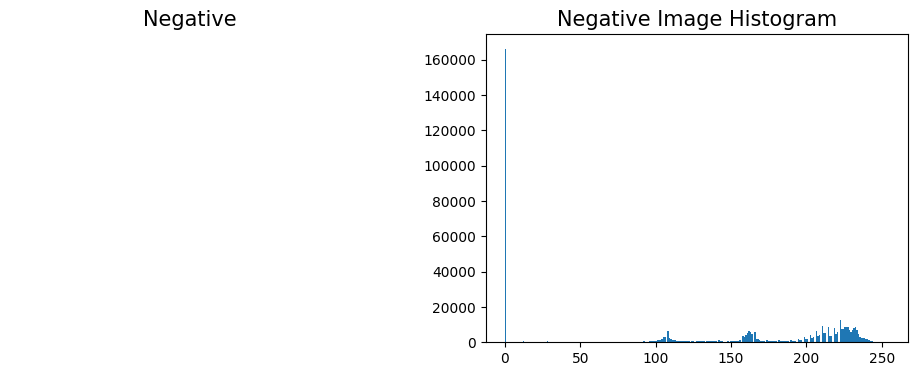

In [143]:
ori_img = util.img_as_ubyte(baby_patrick)

neg_img = 255 - ori_img

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(neg_img)
plt.title('Negative', fontsize=15)
plt.axis("off")

img_flat = util.img_as_ubyte(neg_img).flatten()

plt.subplot(1, 2, 2)
plt.hist(img_flat, 256, range=(0, 255))
plt.title('Negative Image Histogram', fontsize=15)

plt.show()

### b. Tampilkan histogram citra tersebut dengan range intensitas 0 - 255. Lakukan log processing terhadap citra baby-patrick tersebut, kemudian tampilkan histogramnya.

#### Log Processing:

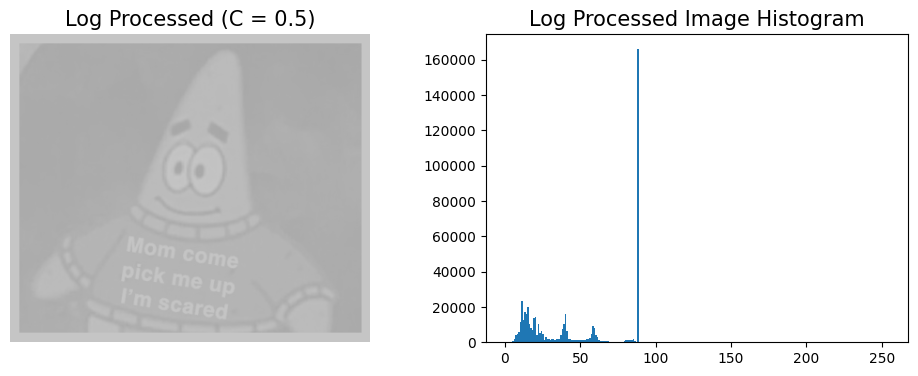

In [144]:
ori_img = baby_patrick

a = ori_img / 255
c = 0.5
lp = c * np.log(1 + (a))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(lp)
plt.axis("off")
plt.title(f'Log Processed (C = {c})', fontsize=15)

img_flat = util.img_as_ubyte(lp).flatten()

plt.subplot(1, 2, 2)
plt.hist(img_flat, 256, range=(0, 255))
plt.title('Log Processed Image Histogram', fontsize=15)

plt.show()

### c. Tampilkan histogram citra tersebut dengan range intensitas 0 - 255. Lakukan gamma transformation terhadap citra baby-patrick tersebut, kemudian tampilkan histogramnya.

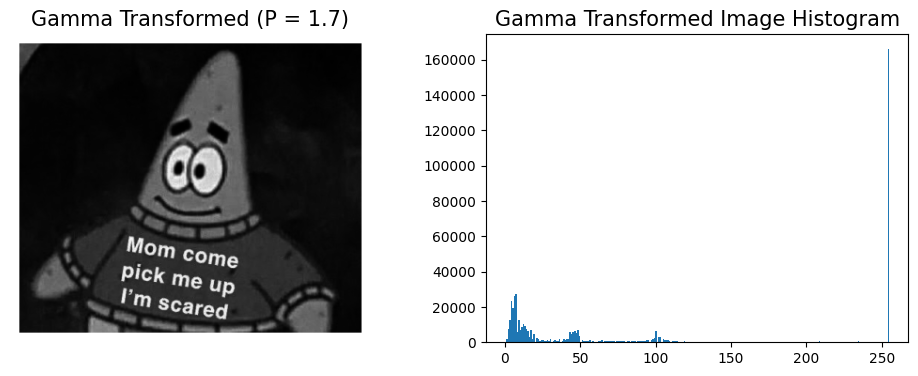

In [145]:
ori_img = baby_patrick

a = ori_img / 255
c = 1
p = 1.7
g = c * (a**p)

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.imshow(g)
plt.axis("off")
plt.title(f'Gamma Transformed (P = {p})', fontsize=15)

img_flat = util.img_as_ubyte(g).flatten()

plt.subplot(1, 2, 2)
plt.hist(img_flat, 256, range=(0, 255))
plt.title('Gamma Transformed Image Histogram', fontsize=15)

plt.show()

### d. Jelaskan perbedaan yang Anda dapatkan dari ketiga metode tersebut, image negative, log processing, gamma transformation, utamanya dari segi karakteristik histogramnya.

#### **Image Negative:**
Plot menghasilkan gambar blank, namun seharusnya negative image membuat intensitas pixel pada gambar menjadi terbalik, sehingga yang awalnya gelap menjadi terang dan yang awalnya terang menjadi gelap. Histogramnya kebalikan dari histogram gambar original.

#### **Log Processing:**
Bagian gelap pada gambar menjadi lebih terang dan bagian terang pada pixel menjadi lebih gelap/abu-abu. Histogramnya menjadi lebih sempit ke kiri karena keterangan pixel menjadi lebih mirip.

#### **Gamma Transformation:**
Warna pada gambar menjadi semakin pekat. Histogramnya menjadi lebih menyebar ke kiri karena pixel semakin gelap.

## 2. Spiral

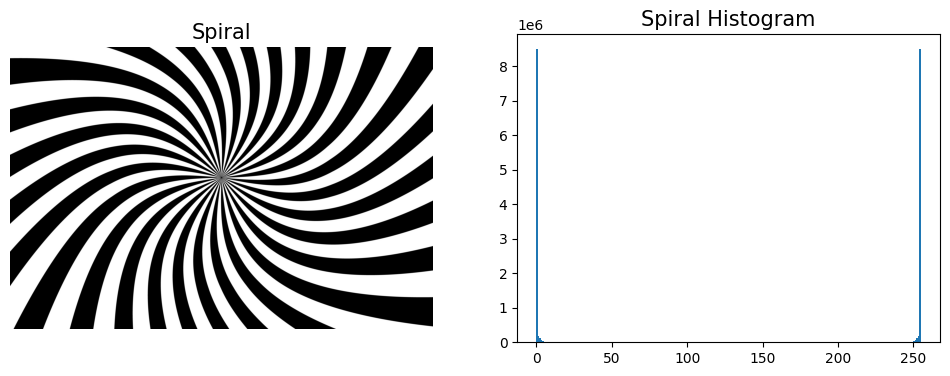

In [146]:
spiral = io.imread('lab/spiral.png')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(spiral, vmin=0, vmax=255)
plt.axis("off")
plt.title('Spiral', fontsize=15)

img_flat = util.img_as_ubyte(spiral).flatten()

plt.subplot(1, 2, 2)
plt.hist(img_flat, 256, range=(0, 255))
plt.title('Spiral Histogram', fontsize=15)

plt.show()

### a.  Ubah citra menjadi gray, lalu terapkan edge segmentation menggunakan **prewitt**, **roberts**, dan **sobel**.

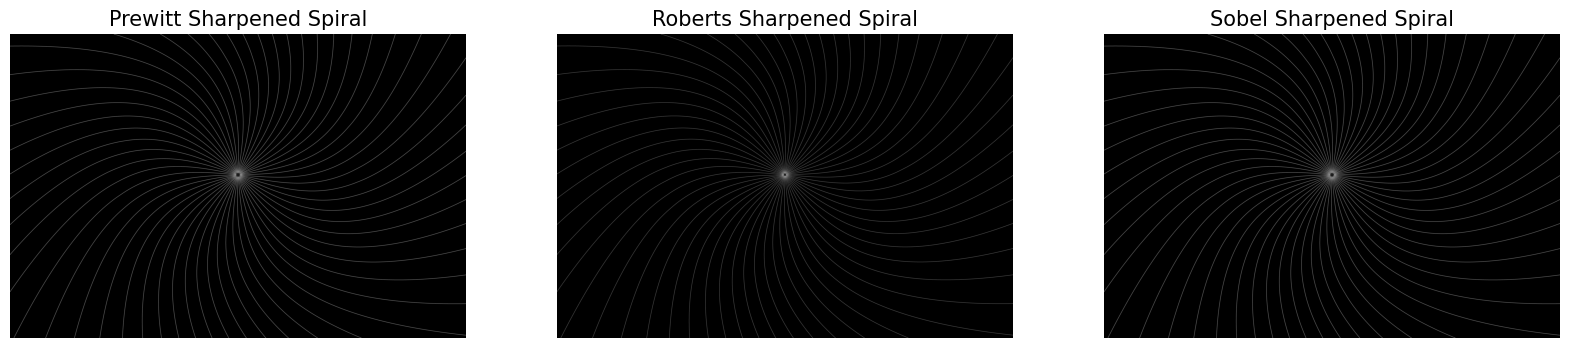

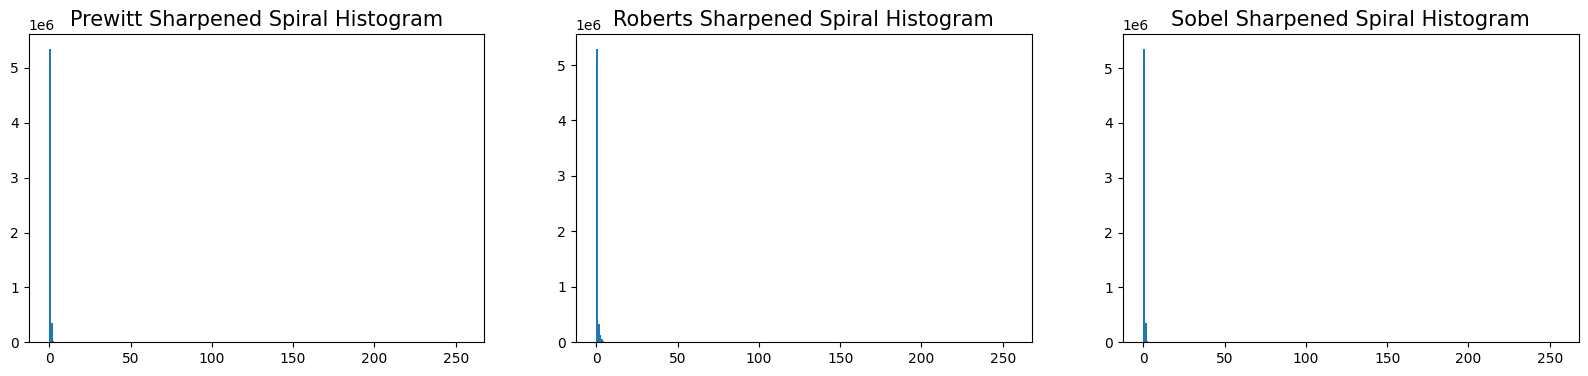

In [147]:
img = color.rgb2gray(spiral)

spiral_prewitt = util.img_as_ubyte(filters.prewitt(img))
spiral_roberts = util.img_as_ubyte(filters.roberts(img))
spiral_sobel = util.img_as_ubyte(filters.sobel(img))

plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.imshow(spiral_prewitt, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Prewitt Sharpened Spiral', fontsize=15)

plt.subplot(1, 3, 2)
plt.imshow(spiral_roberts, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Roberts Sharpened Spiral', fontsize=15)

plt.subplot(1, 3, 3)
plt.imshow(spiral_sobel, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Sobel Sharpened Spiral', fontsize=15)

plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.hist(util.img_as_ubyte(spiral_prewitt.flatten()), bins=256, range=(0, 255))
plt.title('Prewitt Sharpened Spiral Histogram', fontsize=15)

plt.subplot(1, 3, 2)
plt.hist(util.img_as_ubyte(spiral_roberts.flatten()), bins=256, range=(0, 255))
plt.title('Roberts Sharpened Spiral Histogram', fontsize=15)

plt.subplot(1, 3, 3)
plt.hist(util.img_as_ubyte(spiral_sobel.flatten()), bins=256, range=(0, 255))
plt.title('Sobel Sharpened Spiral Histogram', fontsize=15)

plt.show()

### b. Apa perbedaan yang dihasilkan oleh masing-masing edge detection?

Perbedaannya tidak signifikan, hanya saja prewitt dan sobel lebih kontras daripada roberts

### c. Terapkan gaussian filtering dengan kernel (1, 1) dan (5, 5) pada citra spiral, lalu tampilkan hasilnya!

(-0.5, 2999.5, 1999.5, -0.5)

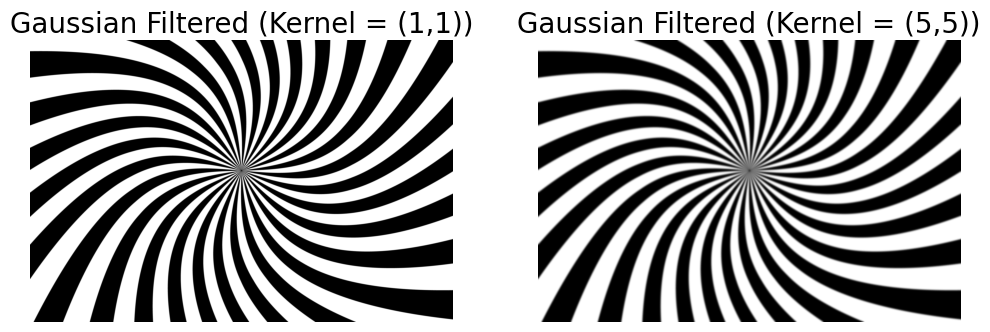

In [148]:
gray = color.rgb2gray(spiral)
spiral_gauss1 = util.img_as_ubyte(filters.gaussian(gray, sigma=1))
spiral_gauss5 = util.img_as_ubyte(filters.gaussian(gray, sigma=5))

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.imshow(spiral_gauss1, cmap='gray', vmin=0, vmax=255)
plt.title('Gaussian Filtered (Kernel = (1,1))', fontsize=20)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(spiral_gauss5, cmap='gray', vmin=0, vmax=255)
plt.title('Gaussian Filtered (Kernel = (5,5))', fontsize=20)
plt.axis("off")

### d. Terapkan ketiga edge detection yang sudah dilakukan sebelumnya pada citra spiral yang sudah dilakukan gaussian filtering dengan kernel (5, 5)!

Text(0.5, 1.0, 'Sobel Sharpened Spiral')

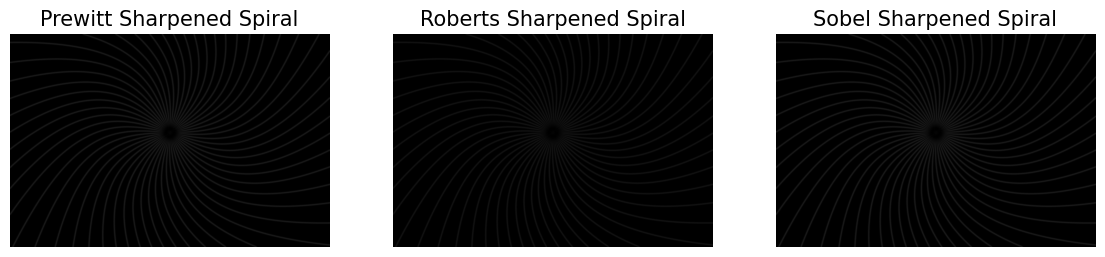

In [149]:
gray = color.rgb2gray(spiral)
spiral_gauss5 = util.img_as_ubyte(filters.gaussian(gray, sigma=5))

spiral_gauss5_prewitt = util.img_as_ubyte(filters.prewitt(spiral_gauss5))
spiral_gauss5_roberts = util.img_as_ubyte(filters.roberts(spiral_gauss5))
spiral_gauss5_sobel = util.img_as_ubyte(filters.sobel(spiral_gauss5))

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.imshow(spiral_gauss5_prewitt, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Prewitt Sharpened Spiral', fontsize=15)

plt.subplot(1, 3, 2)
plt.imshow(spiral_gauss5_roberts, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Roberts Sharpened Spiral', fontsize=15)

plt.subplot(1, 3, 3)
plt.imshow(spiral_gauss5_sobel, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Sobel Sharpened Spiral', fontsize=15)

### e. Apakah ada hasil edge detection sangat mirip? Apa yang paling berbeda? Jika ada yang mirip, coba identifikasi apa yang membuat hal tersebut terjadi. Jika tidak ada yang mirip, apa yang membedakan semuanya?

Hasilnya sangat mirip antara prewitt dan sobel, namun berbeda dengan roberts. Roberts memiliki penyebaran intensitas pixel yang lebih merata daripada prewit dan sobel.

## 3. Noisy Mike

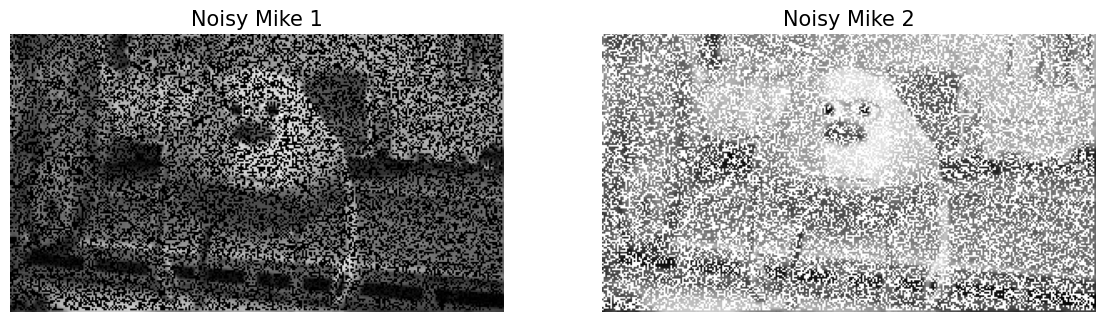

In [150]:
noisy_mike1 = io.imread('lab/noisy_mike_1.jpg')
noisy_mike2 = io.imread('lab/noisy_mike_2.jpg')

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.imshow(noisy_mike1, vmin=0, vmax=255)
plt.axis('off')
plt.title('Noisy Mike 1', fontsize=15)

plt.subplot(1, 2, 2)
plt.imshow(noisy_mike2, vmin=0, vmax=255)
plt.axis('off')
plt.title('Noisy Mike 2', fontsize=15)

plt.show()

### a. Terapkan minimum filter pada kedua citra tersebut dengan ukuran kernel 3x3, kemudian tampilkan perbandingan keduanya

/Users/azardian/anaconda3/envs/pengcit_ui/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Noisy Mike 2')

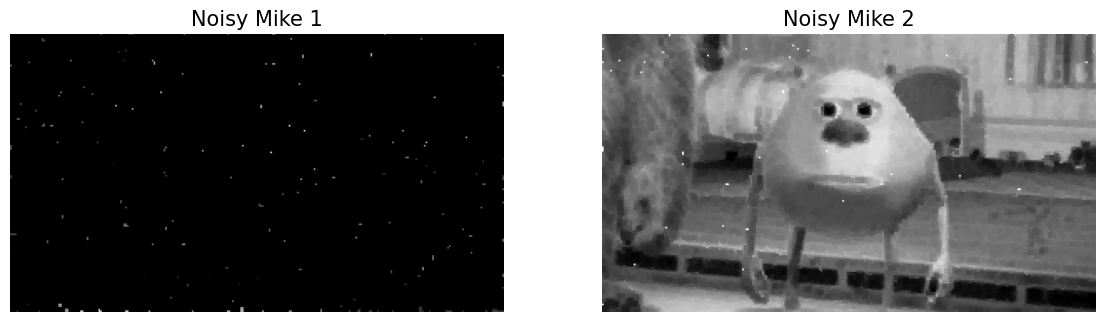

In [151]:
noisy_mike1_gray = color.rgb2gray(noisy_mike1)
noisy_mike2_gray = color.rgb2gray(noisy_mike2)

noisy_mike1_minifi = filters.rank.minimum(noisy_mike1_gray, morphology.square(3))
noisy_mike2_minifi = filters.rank.minimum(noisy_mike2_gray, morphology.square(3))

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.imshow(noisy_mike1_minifi, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Noisy Mike 1', fontsize=15)

plt.subplot(1, 2, 2)
plt.imshow(noisy_mike2_minifi, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Noisy Mike 2', fontsize=15)

### b. Terapkan maximum filter pada kedua citra tersebut dengan ukuran kernel 3x3, kemudian tampilkan perbandingan keduanya

Text(0.5, 1.0, 'Noisy Mike 2')

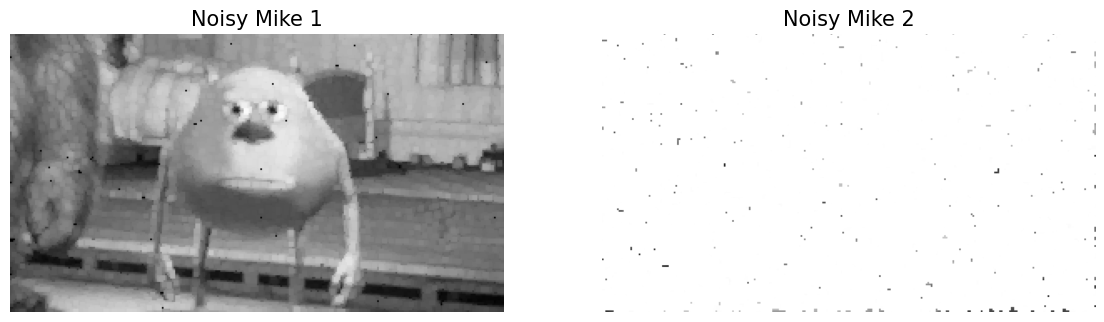

In [152]:
noisy_mike1_gray = color.rgb2gray(noisy_mike1)
noisy_mike2_gray = color.rgb2gray(noisy_mike2)

noisy_mike1_maxfi = filters.rank.maximum(noisy_mike1_gray, morphology.square(3))
noisy_mike2_maxfi = filters.rank.maximum(noisy_mike2_gray, morphology.square(3))

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.imshow(noisy_mike1_maxfi, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Noisy Mike 1', fontsize=15)

plt.subplot(1, 2, 2)
plt.imshow(noisy_mike2_maxfi, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Noisy Mike 2', fontsize=15)

### c. Apa yang dapat Anda simpulkan dari soal 3a dan 3b? Jelaskan!

Noisy mike 1 dan noisy mike 2 membutuhkan filter yang berbeda. Hal tersebut disebabkan oleh perbedaan warna noise pada masing-masing gambarnya

### d. Menurut pendapat Anda, kapan minimum filter cocok untuk digunakan, kapan maximum filter cocok untuk digunakan? Anda dapat memberikan contoh ilustrasi untuk mendukung penjelasan Anda.

Minimum filter digunakan jika noise pada gambar dominan putih atau terang. Sementara maximum filter digunakan jika noise pada gambar dominan hitam atau gelap